In [15]:
#import modul
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import random

In [16]:
#count layer cnn
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [17]:
#mengambil data .jpg
def load_data(data_directory):

    directories = [d for d in os.listdir(data_directory)
    if os.path.isdir(os.path.join(data_directory,d))]
    labels = []
    images = []

    for d in directories:
        label_directory = os.path.join(data_directory,d)
        file_names = [os.path.join(label_directory,f)
        for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            images.append(cv2.imread(f))
            labels.append(int(d))
    return images, labels

In [18]:
#model cnn
def neural_network(input):
    layer_1 = tf.layers.dense(input, 300, activation=tf.nn.relu)
    layer_2 = tf.layers.dense(layer_1, 150, activation=tf.nn.relu)
    layer_3 = tf.layers.dense(layer_2, 50, activation=tf.nn.relu)
    layer_out = tf.layers.dense(layer_3, 5)
    return layer_out 

In [19]:
#lokasi file
ROOT_PATH = "F:\Berkas CCIT dan PNJ\Semester 5\Machine Learning"

In [20]:
#lokasi datasets
train_data_directory = os.path.join(ROOT_PATH, "dataset")

In [21]:
#membuat object dari dataset
images, labels = load_data(train_data_directory)

In [22]:
print ("Ukuran gambar: ", images[0].shape)
print ("Banyaknya label: ", len(set(labels)))

Ukuran gambar:  (450, 600, 3)
Banyaknya label:  3


In [23]:
#resize ukuran foto
dim = (30,30)
images30 = []

In [24]:
#mengubah warna gambar
for image in images:
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    images30.append(cv2.resize(gray_image, dim, interpolation = cv2.INTER_CUBIC))

In [25]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30, 30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

In [26]:
images_flat = tf.contrib.layers.flatten(x)

In [27]:
logits = neural_network(images_flat)

In [28]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = y))

In [29]:
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

In [30]:
correct_pred = tf.argmax(logits, 1)

In [31]:
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [32]:
tf.set_random_seed(1234)

Loss :  104.12491 Accuracy:  3.980198
Loss :  8.497376 Accuracy:  1.0330033
Loss :  10.095624 Accuracy:  1.0033003
Loss :  11.839137 Accuracy:  0.105610564
Loss :  9.919176 Accuracy:  1.9636964
Loss :  4.1735063 Accuracy:  0.8448845
Loss :  3.180964 Accuracy:  0.9768977
Loss :  2.077545 Accuracy:  0.9669967
Loss :  2.433445 Accuracy:  1.1518152
Loss :  1.4838961 Accuracy:  0.84158415
Loss :  1.4207355 Accuracy:  0.9141914
Loss :  3.6614974 Accuracy:  1.8580858
Loss :  7.710222 Accuracy:  1.7260725
Loss :  12.287128 Accuracy:  0.83828384
Loss :  7.004086 Accuracy:  1.2541254
Loss :  6.8642306 Accuracy:  0.50825083
Loss :  3.5961652 Accuracy:  1.0528053
Loss :  4.3059797 Accuracy:  1.1815182
Loss :  2.6525717 Accuracy:  0.5709571
Loss :  1.543325 Accuracy:  0.6039604
Loss :  1.2231622 Accuracy:  1.2607261
Loss :  1.0981746 Accuracy:  0.68646866
Loss :  2.168802 Accuracy:  1.0825082
Loss :  1.4642768 Accuracy:  1.1287129
Loss :  1.0078273 Accuracy:  0.83168316


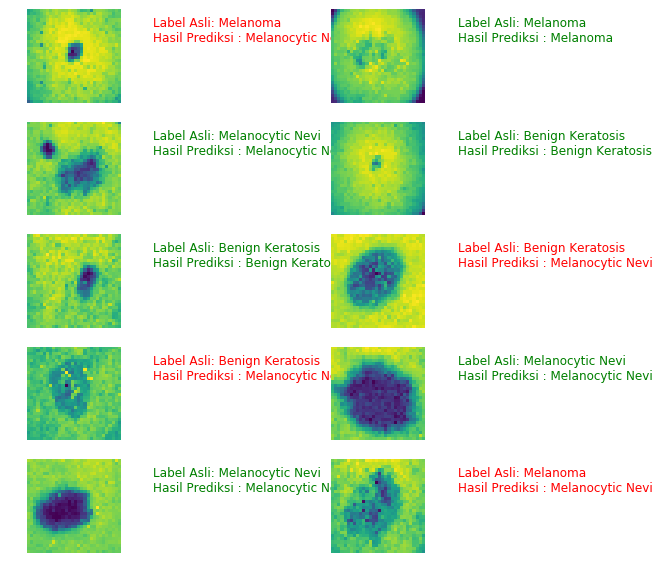

In [44]:
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for i in range(250): 
        _, loss_val, acc_val = sess.run([train_op, loss, accuracy],
        feed_dict={x:images30,y:labels})
        
        if i % 10 == 0:
            print("Loss : ", loss_val, "Accuracy: ", acc_val)

    sample_indexes = random.sample(range(len(images30)), 10)
    sample_images = [images30[i] for i in sample_indexes]
    sample_labels = [labels[i] for i in sample_indexes]

    labels_name = ["Benign Keratosis","Melanocytic Nevi","Melanoma"]

    list_prediction = sess.run([correct_pred], feed_dict={x:sample_images})[0]

    fig = plt.figure(figsize=(10,10))  
    
    for i in range (len(sample_images)):
    
        truth_label = sample_labels[i]

        predicted_label = list_prediction[i]

        plt.subplot(5, 2, i+1) 

        plt.axis("off")

        color='green' if predicted_label==truth_label else 'red'

        plt.text(40,10, "Label Asli: {0}\nHasil Prediksi : {1}" .format(labels_name[truth_label],labels_name[predicted_label]), fontsize=12, color=color)

        plt.imshow(sample_images[i]) 

    plt.show()